In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.preprocessing.image import ImageDataGenerator

print("Working")

Working


In [2]:
img1_array=cv2.imread("fer2013/train/angry/Training_10118481.jpg")
img1_array.shape

(48, 48, 3)

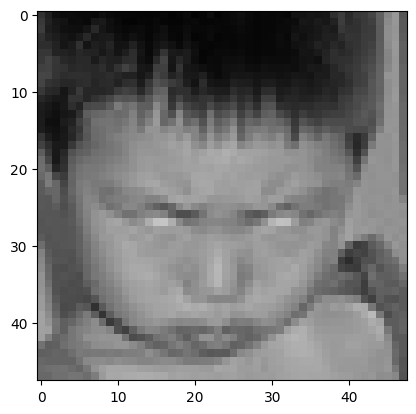

In [3]:
plt.imshow(img1_array)

In [4]:
train_data = "fer2013/train/"
test_data = "fer2013/test/"

In [5]:
classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]

In [51]:


training_data = []
testing_data = []

train_datagen = ImageDataGenerator(
     rescale = 1 / 255.,
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.2,  
    zoom_range=0.1,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)

test_datagen = ImageDataGenerator(
    rescale = 1/255.,)

# Load and preprocess images from directory
train_generator = train_datagen.flow_from_directory(
    directory="fer2013/train/",
    target_size=(48, 48),  # resize images to 224x224 pixels
    batch_size=64,
    color_mode='rgb',  # Ensure images are in RGB format
    class_mode='categorical',
    shuffle = True,
)

test_generator = test_datagen.flow_from_directory(
    directory="fer2013/test/",
    color_mode='rgb',  # Ensure images are in RGB format
    target_size=(48, 48),  # resize images to 224x224 pixels
    batch_size=64,
    class_mode='categorical',
    shuffle = False,
)



def create_train_test(given_path):
    for category in classes:
        path=os.path.join(given_path, category)
        class_ind=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                newarr = cv2.resize(img_array, (224, 224))  #since the model we will be using (imagenet) requires images to be of 224
                training_data.append([newarr,class_ind])
            except Exception as e:
                pass

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
print("start")
create_train_test(train_data)
print("done")

start
done


In [8]:
print(len(training_data))

28709


In [9]:
random.shuffle(training_data)

In [10]:
X1_train = [] #images
X2_train = [] #corresponding image labels (0:angry, 1:disgust , ....)

for image, lb in training_data:
    X1_train.append(image)
    X2_train.append(lb)
    
X1_train = np.array(X1_train).reshape(-1, 224, 224, 3)
print("done")

done


In [11]:
print(X1_train.shape)

(28709, 224, 224, 3)


In [12]:
#normalizing data
from sklearn.preprocessing import normalize
X1_train = X1_train/255.0;
print("done")

done


In [13]:
X2_train[1000]

3

In [16]:
X1_ind=np.array(X2_train)

In [17]:
X1_ind.shape

(28709,)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
base_model = tf.keras.applications.MobileNetV2()
print("working")

working


In [20]:
print(base_model.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [21]:
base_inp = base_model.layers[0].input
base_inp

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [22]:
base_out = base_model.layers[-2].output

In [23]:
fin_out = layers.Dense(128)(base_out)
fin_out = layers.Activation('relu')(fin_out)
fin_out = layers.Dense(64)(fin_out)
fin_out = layers.Activation('relu')(fin_out)
fin_out = layers.Dense(7,activation='softmax')(fin_out)

In [24]:
fin_out

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [25]:
update_model = keras.Model(inputs = base_inp, outputs = fin_out)

In [26]:
update_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [27]:
update_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#update_model.fit(X1_train, X1_ind, epochs = 20)
update_model.fit(train_generator, epochs=20, steps_per_epoch=len(train_generator))


In [43]:
from tensorflow.keras.layers import *
from tensorflow.keras import layers , models, optimizers
from tensorflow.keras.models import Sequential, Model


def createModel():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(7,activation='softmax'))
    
    
    return model

print("Done")

Done


In [44]:
self_model = createModel()
self_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                      

In [55]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

checkpoint_path = "CNN_Model_Checkpoint"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True, verbose=1)

Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.000005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
print(steps_per_epoch)

897


In [57]:
self_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

self_model.fit( train_generator , validation_data= test_generator , epochs=40, batch_size= 64, callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)

Epoch 1/40
897/897 [==============================] - 461s 508ms/step - loss: 1.8737 - accuracy: 0.2263 - val_loss: 1.7671 - val_accuracy: 0.2768 - lr: 0.0010
Epoch 2/40
897/897 [==============================] - 326s 363ms/step - loss: 1.7549 - accuracy: 0.2824 - val_loss: 1.6466 - val_accuracy: 0.3425 - lr: 0.0010
Epoch 3/40
897/897 [==============================] - 298s 332ms/step - loss: 1.5868 - accuracy: 0.3774 - val_loss: 1.4067 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 4/40
897/897 [==============================] - 257s 287ms/step - loss: 1.4456 - accuracy: 0.4399 - val_loss: 1.2927 - val_accuracy: 0.5008 - lr: 0.0010
Epoch 5/40
897/897 [==============================] - 257s 287ms/step - loss: 1.3721 - accuracy: 0.4775 - val_loss: 1.2166 - val_accuracy: 0.5299 - lr: 0.0010
Epoch 6/40
897/897 [==============================] - 254s 283ms/step - loss: 1.3196 - accuracy: 0.4992 - val_loss: 1.2454 - val_accuracy: 0.5271 - lr: 0.0010
Epoch 7/40
897/897 [==========================

In [58]:
self_model.save("Face_Emotional_analysis.h5")
print("Model Successfully saved")

Model Successfully saved


In [5]:
from tensorflow.keras.models import load_model
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
face_model = load_model("Face_Emotional_analysis.h5")
face_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                      

In [6]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame= cap.read()
    frame = cv2.resize(frame, (1280,720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    for (x,y,w,h) in num_faces:
        cv2.rectangle(frame,(x,y-50), (x+w, y+h+10), (0,255,0), 4)
        roi_gray_frame = gray_frame[y:y+h, x:x+w]
        #cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48,48)),-1),0)
        cropped_img = cv2.resize(roi_gray_frame, (48, 48))
        cropped_img = np.expand_dims(cropped_img, axis=-1)  # Add channel dimension
        cropped_img = np.expand_dims(cropped_img, axis=0) 
        
        emotion_prediction = face_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)
    
    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: in user code:

    File "C:\Users\Prateek gupta\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Prateek gupta\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Prateek gupta\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Prateek gupta\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\Prateek gupta\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Prateek gupta\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\input_spec.py", line 278, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 48, 48, 1)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 48, 48, 1), dtype=uint8)
      • training=False
      • mask=None
